In [2]:
import pandas as pd


# Load the language df
df = pd.read_csv('../data/cleaned/oc_corroborated_langdata.csv')

df.head()

,doi,id,title,publication_year,language,type,type_crossref,open_access,accepted,published,country,cited_by_count,field,subfield
0,10.1007/s40274-019-6237-3,1,SC insulin infusion pump in T1DM: health gains...,2019,en,article,journal-article,False,False,False,NaN,0,Medicine,"Endocrinology, Diabetes and Metabolism"
1,10.1007/s40274-019-6231-9,2,Modelling approaches should be justified in ec...,2019,en,article,journal-article,False,False,False,NaN,0,"Economics, Econometrics and Finance",Economics and Econometrics
2,10.1007/s40274-019-6225-7,4,Ferric carboxymaltose for iron deficiency in d...,2019,en,article,journal-article,False,False,False,NaN,0,Medicine,Hematology
3,10.1007/s40274-019-6223-9,5,ED-SAFE intervention cost effective for suicid...,2019,en,article,journal-article,False,False,False,NaN,0,Psychology,Clinical Psychology
4,10.1007/s40274-019-6224-8,7,Fecal transplants cost effective for recurrent...,2019,en,article,journal-article,False,False,False,NaN,0,Medicine,Infectious Diseases


In [3]:
# Calculate the frequency of each field and language
field_counts = df['field'].value_counts(normalize=True) * 100
language_counts = df['language'].value_counts(normalize=True) * 100

# Get the top 5 fields and languages
top_fields = field_counts.head(5)
top_languages = language_counts.head(5)

# Combine the results into a single DataFrame
top_summary = pd.concat([top_fields, top_languages], axis=1, keys=['Field', 'Language']).fillna(0)

top_summary

,Field,Language
Medicine,23.760051,0.000000
Engineering,13.244754,0.000000
"Biochemistry, Genetics and Molecular Biology",8.641960,0.000000
Social Sciences,7.087015,0.000000
Computer Science,5.537115,0.000000
en,0.000000,96.875180
tr,0.000000,0.686574
es,0.000000,0.612651
de,0.000000,0.374104
fr,0.000000,0.323155


In [6]:
# Calculate the frequency of each field and language
field_counts = df['field'].value_counts(normalize=False)
language_counts = df['language'].value_counts(normalize=False)

language_counts

en       7189297
tr         50952
es         45466
de         27763
fr         23982
pt         20820
id         18490
ru          8438
uk          6887
ko          5116
ja          4343
pl          3975
it          2348
cs          1431
no          1429
hu          1196
ro          1166
nl          1121
ca          1095
vi           674
zh-cn        608
sl           557
da           529
hr           423
tl           406
sv           378
ar           376
sk           299
af           296
et           243
fi           197
lt           190
bg           140
cy           134
fa            96
mk            70
el            68
ng            51
sw            50
so            27
sq            25
lv            15
th             9
hi             8
gu             5
zh-tw          4
bn             2
he             1
Name: language, dtype: int64

In [7]:
res_05 = pd.read_csv('../data/cleaned/oc_oa_crossref_corroborated_filtered_network_leiden-20240721-203003/leiden_res0.5_i2/S3_oc_oa_crossref_corroborated_filtered_network_leiden.res0.5_i2_stats.csv')

res_05.head()

<ipython-input-7-9d25f86d425b>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  res_05 = pd.read_csv('../data/cleaned/oc_oa_crossref_corroborated_filtered_network_leiden-20240721-203003/leiden_res0.5_i2/S3_oc_oa_crossref_corroborated_filtered_network_leiden.res0.5_i2_stats.csv')


,cluster,n,m,modularity,cpm_score,connectivity,connectivity_normalized_log10(n),connectivity_normalized_log2(n),connectivity_normalized_sqrt(n)/5,conductance
0,344947,2,1,3.775727e-08,0.5,1.0,3.321928,1.00000,3.535534,0.950000
1,49422,4,5,1.887839e-07,2.0,2.0,3.321928,1.00000,5.000000,0.918033
2,110238,3,3,1.132711e-07,1.5,2.0,4.191807,1.26186,5.773503,0.927711
3,344948,2,1,3.775772e-08,0.5,1.0,3.321928,1.00000,3.535534,0.894737
4,344949,2,1,3.775775e-08,0.5,1.0,3.321928,1.00000,3.535534,0.875000


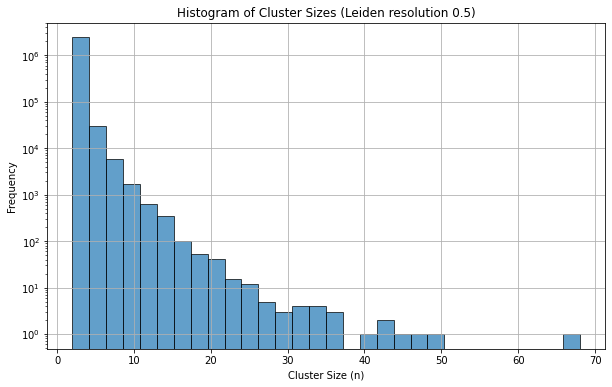

In [18]:
import matplotlib.pyplot as plt

# Remove the last row of the DataFrame
res_05 = res_05[:-1]

# Plot a histogram of cluster sizes with Leiden resolution 0.5
plt.figure(figsize=(10, 6))
plt.hist(res_05['n'], bins=30, edgecolor='k', alpha=0.7)
plt.yscale('log')
plt.title('Histogram of Cluster Sizes (Leiden resolution 0.5)')
plt.xlabel('Cluster Size (n)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<ipython-input-13-f1c476c24bef>:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  res_01 = pd.read_csv('../data/cleaned/oc_oa_crossref_corroborated_filtered_network_leiden-20240721-203003/leiden_res0.1_i2/S3_oc_oa_crossref_corroborated_filtered_network_leiden.res0.1_i2_stats.csv')


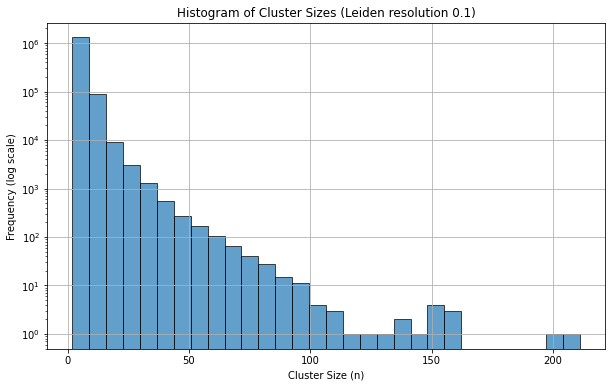

In [13]:
def plot_hist(df, res):
    # Remove the last row of the DataFrame
    df = df[:-1]

    # Plot a histogram of cluster sizes with Leiden resolution 0.5 and log scaling on the y-axis
    plt.figure(figsize=(10, 6))
    plt.hist(df['n'], bins=30, edgecolor='k', alpha=0.7)
    plt.yscale('log')
    plt.title(f'Histogram of Cluster Sizes (Leiden resolution {res})')
    plt.xlabel('Cluster Size (n)')
    plt.ylabel('Frequency (log scale)')
    plt.grid(True)
    plt.show()
    
res_01 = pd.read_csv('../data/cleaned/oc_oa_crossref_corroborated_filtered_network_leiden-20240721-203003/leiden_res0.1_i2/S3_oc_oa_crossref_corroborated_filtered_network_leiden.res0.1_i2_stats.csv')
plot_hist(res_01, 0.1)

<ipython-input-16-fcdc5702e0e2>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  res_001 = pd.read_csv('../data/cleaned/oc_oa_crossref_corroborated_filtered_network_leiden-20240721-203003/leiden_res0.01_i2/S3_oc_oa_crossref_corroborated_filtered_network_leiden.res0.01_i2_stats.csv')


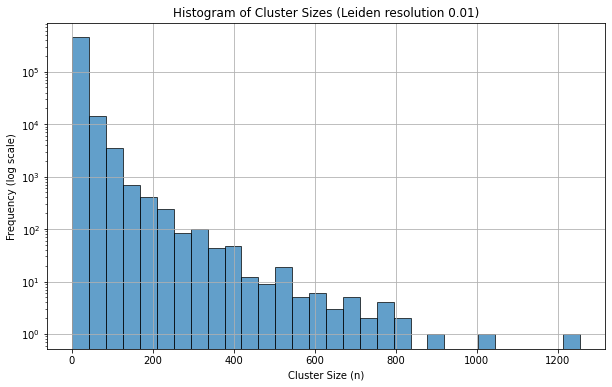

In [16]:
res_001 = pd.read_csv('../data/cleaned/oc_oa_crossref_corroborated_filtered_network_leiden-20240721-203003/leiden_res0.01_i2/S3_oc_oa_crossref_corroborated_filtered_network_leiden.res0.01_i2_stats.csv')
plot_hist(res_001, 0.01)

<ipython-input-17-da3229fdd59d>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  res_0001 = pd.read_csv('../data/cleaned/oc_oa_crossref_corroborated_filtered_network_leiden-20240721-203003/leiden_res0.001_i2/S3_oc_oa_crossref_corroborated_filtered_network_leiden.res0.001_i2_stats.csv')


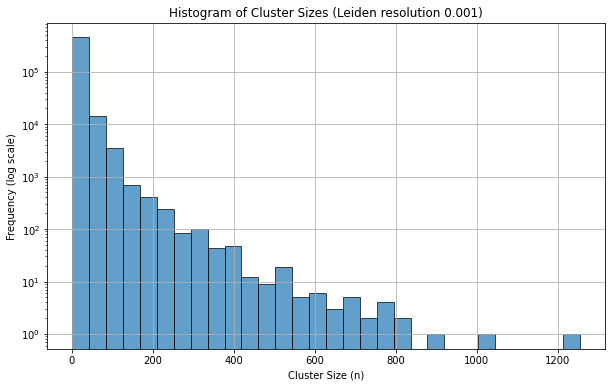

In [17]:
res_0001 = pd.read_csv('../data/cleaned/oc_oa_crossref_corroborated_filtered_network_leiden-20240721-203003/leiden_res0.001_i2/S3_oc_oa_crossref_corroborated_filtered_network_leiden.res0.001_i2_stats.csv')
plot_hist(res_001, 0.001)

In [20]:
comp_01 = pd.read_csv('../data/cleaned/oc_oa_crossref_corroborated_filtered_network_leiden-20240721-203003/leiden_res0.1_i2/S2_oc_oa_crossref_corroborated_filtered_network_leiden.0.1_i2_clustering_cluster_comp.csv')
comp_01.head()

,cluster_id,Agricultural and Biological Sciences,Arts and Humanities,"Biochemistry, Genetics and Molecular Biology","Business, Management and Accounting",Chemical Engineering,Chemistry,Computer Science,Decision Sciences,Dentistry,...,sq,sv,sw,th,tl,tr,uk,vi,zh-cn,zh-tw
0,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.000000,0.0,0.0,0.0,1.234568,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,1.840491,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
